In [43]:
import sys
sys.path.append("C:\\Users\josep\Documents\Anaconda\pkgs")
import help_tools
import wave_tools
import cv2
import h5py
from matplotlib import cm
import radar_tools

In [2]:
import numpy as np
from wave_tools import ConstructWave, surface_core, peak_tracking
from wave_tools import fft_interpolate, fft_interface
from wave_tools import SpectralAnalysis
import matplotlib.pyplot as plt
from help_tools import plotting_interface
from wave_tools import surface_core, fft_interface, dispersionRelation

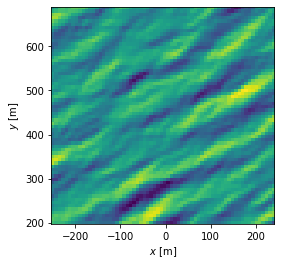

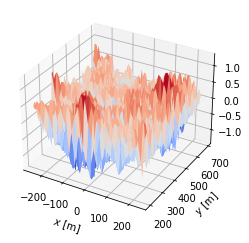

In [3]:
Hs = 2.0
Alpha = 0.023
smax = 70
theta_mean = np.pi/2+30*np.pi/180
gamma = 3.3

dx = 7.5
dy = 7.5
x = np.arange(-250, 245, dx)
y = np.arange(200, 695, dy)

surf2d = ConstructWave.JonswapWave2D(x, y, Hs, Alpha, gamma, theta_mean, smax)
surf2d.plot_3d_as_2d()
surf2d.plot_3d_surface()
plt.show()

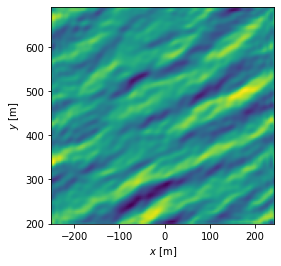

In [4]:
surf2d_interpolated = surf2d.fft_interpolate(2,2)
surf2d_interpolated.plot_3d_as_2d()
plotting_interface.show()

In [5]:
surf2d

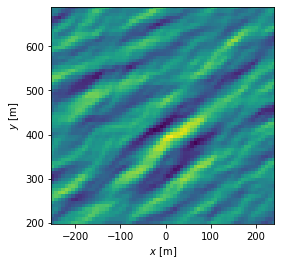

In [6]:
surf2d = ConstructWave.JonswapWave2D(x, y, Hs, Alpha, gamma, theta_mean, smax)
surf2d
surf2d.plot_3d_as_2d()

## Trying my data 

In [7]:
f = h5py.File('shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5', 'r')

In [8]:
x = f.get('x')
y = f.get('y')

In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
surf3d = surface_core.surface_from_file("shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5")

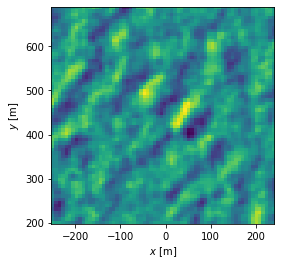

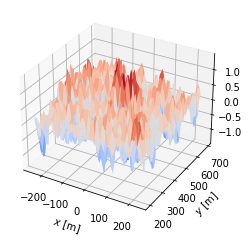

In [11]:
surf3d.plot_3d_as_2d()
surf3d.plot_3d_surface()
plt.show()

In [12]:
k, Uk = surface_core.effective_current_from_file("shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5")

In [13]:
spec3d = surf3d.define_SpectralAnalysis()
spec3d

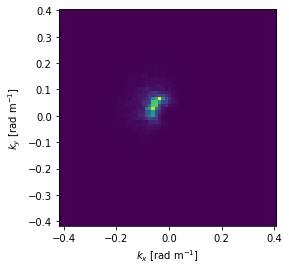

In [14]:
spec3d.plot()

In [15]:
k_limit = 0.4
spec3d_anti_aliased = spec3d.get_anti_aliased_spec3d(k_limit)

In [16]:
spec3d_anti_aliased

Text(0.5, 1.0, 'Anti-aliased plot')

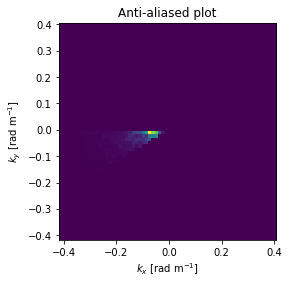

In [17]:
spec3d_anti_aliased.plot()
plt.title("Anti-aliased plot")

In [18]:
kx = spec3d.kx
ky = spec3d.ky 
w = spec3d.w
# Calculates kx, ky and w for the spectral domain 

In [19]:
w.shape
# shape of w is 600 but shape of kx and ky is 66
# do we have to subsample w to get coresspoding values

(600,)

In [20]:
kx

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [21]:
ky

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [22]:
w

array([-3.14159265e+00, -3.13112068e+00, -3.12064870e+00, -3.11017673e+00,
       -3.09970475e+00, -3.08923278e+00, -3.07876080e+00, -3.06828883e+00,
       -3.05781685e+00, -3.04734487e+00, -3.03687290e+00, -3.02640092e+00,
       -3.01592895e+00, -3.00545697e+00, -2.99498500e+00, -2.98451302e+00,
       -2.97404105e+00, -2.96356907e+00, -2.95309709e+00, -2.94262512e+00,
       -2.93215314e+00, -2.92168117e+00, -2.91120919e+00, -2.90073722e+00,
       -2.89026524e+00, -2.87979327e+00, -2.86932129e+00, -2.85884931e+00,
       -2.84837734e+00, -2.83790536e+00, -2.82743339e+00, -2.81696141e+00,
       -2.80648944e+00, -2.79601746e+00, -2.78554549e+00, -2.77507351e+00,
       -2.76460154e+00, -2.75412956e+00, -2.74365758e+00, -2.73318561e+00,
       -2.72271363e+00, -2.71224166e+00, -2.70176968e+00, -2.69129771e+00,
       -2.68082573e+00, -2.67035376e+00, -2.65988178e+00, -2.64940980e+00,
       -2.63893783e+00, -2.62846585e+00, -2.61799388e+00, -2.60752190e+00,
       -2.59704993e+00, -

In [23]:
spec3d_anti_aliased.w.shape
# Anti aliased spectrum doubles the amount of times sampled

(1198,)

2 2.0001473227855016 191


Text(0.5, 1.0, 'Spectra Plot at W = 3')

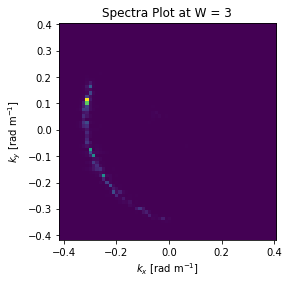

In [24]:
spec3d.plot_w_slice(2)
# Method for 3D, plot kx-ky spectra at a given w

plt.title("Spectra Plot at W = 3")

In [25]:
kx

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [26]:
kx.shape

(66,)

In [27]:
ky.shape

(66,)

In [28]:
w.shape

(600,)

In [29]:
w.shape

(600,)

In [30]:
# Under Sample w 
# Your original array with 600 elements
# The number of values you want to keep
num_values_to_keep = 65

# Calculate the step size to achieve this
step_size = len(w) // num_values_to_keep

# Extract every nth value
under_sampled_w = w[::step_size]

# 'result' will now contain 67 values from 'w' with equal spacing.
# In this code, we first create an array w with 600 elements. We calculate the step_size by dividing the length of w by the number of values you want to keep (67). Then, we use NumPy slicing with the step size to extract every nth value, resulting in the array result containing 67 values from the original array w.


In [31]:
w

array([-3.14159265e+00, -3.13112068e+00, -3.12064870e+00, -3.11017673e+00,
       -3.09970475e+00, -3.08923278e+00, -3.07876080e+00, -3.06828883e+00,
       -3.05781685e+00, -3.04734487e+00, -3.03687290e+00, -3.02640092e+00,
       -3.01592895e+00, -3.00545697e+00, -2.99498500e+00, -2.98451302e+00,
       -2.97404105e+00, -2.96356907e+00, -2.95309709e+00, -2.94262512e+00,
       -2.93215314e+00, -2.92168117e+00, -2.91120919e+00, -2.90073722e+00,
       -2.89026524e+00, -2.87979327e+00, -2.86932129e+00, -2.85884931e+00,
       -2.84837734e+00, -2.83790536e+00, -2.82743339e+00, -2.81696141e+00,
       -2.80648944e+00, -2.79601746e+00, -2.78554549e+00, -2.77507351e+00,
       -2.76460154e+00, -2.75412956e+00, -2.74365758e+00, -2.73318561e+00,
       -2.72271363e+00, -2.71224166e+00, -2.70176968e+00, -2.69129771e+00,
       -2.68082573e+00, -2.67035376e+00, -2.65988178e+00, -2.64940980e+00,
       -2.63893783e+00, -2.62846585e+00, -2.61799388e+00, -2.60752190e+00,
       -2.59704993e+00, -

In [32]:
under_sampled_w

array([-3.14159265, -3.04734487, -2.95309709, -2.85884931, -2.76460154,
       -2.67035376, -2.57610598, -2.4818582 , -2.38761042, -2.29336264,
       -2.19911486, -2.10486708, -2.0106193 , -1.91637152, -1.82212374,
       -1.72787596, -1.63362818, -1.5393804 , -1.44513262, -1.35088484,
       -1.25663706, -1.16238928, -1.0681415 , -0.97389372, -0.87964594,
       -0.78539816, -0.69115038, -0.5969026 , -0.50265482, -0.40840704,
       -0.31415927, -0.21991149, -0.12566371, -0.03141593,  0.06283185,
        0.15707963,  0.25132741,  0.34557519,  0.43982297,  0.53407075,
        0.62831853,  0.72256631,  0.81681409,  0.91106187,  1.00530965,
        1.09955743,  1.19380521,  1.28805299,  1.38230077,  1.47654855,
        1.57079633,  1.66504411,  1.75929189,  1.85353967,  1.94778745,
        2.04203522,  2.136283  ,  2.23053078,  2.32477856,  2.41902634,
        2.51327412,  2.6075219 ,  2.70176968,  2.79601746,  2.89026524,
        2.98451302,  3.0787608 ])

In [33]:
kx

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [34]:
ky

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [35]:
under_sampled_w
# undersampled w 

array([-3.14159265, -3.04734487, -2.95309709, -2.85884931, -2.76460154,
       -2.67035376, -2.57610598, -2.4818582 , -2.38761042, -2.29336264,
       -2.19911486, -2.10486708, -2.0106193 , -1.91637152, -1.82212374,
       -1.72787596, -1.63362818, -1.5393804 , -1.44513262, -1.35088484,
       -1.25663706, -1.16238928, -1.0681415 , -0.97389372, -0.87964594,
       -0.78539816, -0.69115038, -0.5969026 , -0.50265482, -0.40840704,
       -0.31415927, -0.21991149, -0.12566371, -0.03141593,  0.06283185,
        0.15707963,  0.25132741,  0.34557519,  0.43982297,  0.53407075,
        0.62831853,  0.72256631,  0.81681409,  0.91106187,  1.00530965,
        1.09955743,  1.19380521,  1.28805299,  1.38230077,  1.47654855,
        1.57079633,  1.66504411,  1.75929189,  1.85353967,  1.94778745,
        2.04203522,  2.136283  ,  2.23053078,  2.32477856,  2.41902634,
        2.51327412,  2.6075219 ,  2.70176968,  2.79601746,  2.89026524,
        2.98451302,  3.0787608 ])

In [36]:
spec3d.get_peak_dir()

-0.6979021561317582

In [37]:
spec3d.plot_disp_rel_kx_ky(w , h = 10)
# Doesnt do anything ?

In [38]:
disp = spec3d.get_disp_filtered_spec(U = 0.3, h = 4)

AttributeError: '_SpectralAnalysis3d' object has no attribute 'get_disp_filtered_spec'

In [39]:
new_spec3d = surf3d._SpectralAnalysis3d
new_spec3d.plot()

AttributeError: 'Surface' object has no attribute '_SpectralAnalysis3d'

In [41]:
thing = spec3d.estimate_Ueff_psi(h=10,Umax=0.3)
# Missing modules "Radar_tools" ??

ModuleNotFoundError: No module named 'radar_tools'

In [41]:
j = np.array([3,2])

In [42]:
spec3d.estimate_Ueff_psi_at_w_old(j, h = 10, Umax=0.82771777)

C:\Users\josep\Documents\Anaconda\pkgs\wave_tools\dispersionRelation.py:120: RuntimeWarning: overflow encountered in square
  ki = (ww-ki*Ueff*np.cos(phi))**2/(g*np.tanh(ki*h))
C:\Users\josep\Documents\Anaconda\pkgs\wave_tools\dispersionRelation.py:121: RuntimeWarning: invalid value encountered in add
  wwt = np.sqrt(ki*g*np.tanh(ki*h))  + ki*Ueff*np.cos(phi)
C:\Users\josep\Documents\Anaconda\pkgs\wave_tools\dispersionRelation.py:206: RuntimeWarning: overflow encountered in square
  return np.sum(spec_filt * np.abs(k_mesh-f_k_now(th_mesh))**2)
C:\Users\josep\Documents\Anaconda\pkgs\wave_tools\dispersionRelation.py:206: RuntimeWarning: invalid value encountered in multiply
  return np.sum(spec_filt * np.abs(k_mesh-f_k_now(th_mesh))**2)


(array([1.27279221, 1.27279221]), array([0.78539816, 0.78539816]))

In [44]:
spec3d.estimate_Ueff_psi(h = 10, Umax = 0.82)

C:\Users\josep\Documents\Anaconda\pkgs\wave_tools\SpectralAnalysis.py:702: RuntimeWarning: invalid value encountered in divide
  w_peaks = (np.sum(input_spec**pow * ww**pow2, axis=0)/np.sum(input_spec**pow, axis=0))**(1./pow2)


(array([0.80634211, 0.81681409, 0.82728607, 0.83775804, 0.84823002,
        0.85870199, 0.86917397, 0.87964594, 0.89011792, 0.90058989,
        0.91106187, 0.92153385, 0.93200582, 0.9424778 , 0.95294977,
        0.96342175, 0.97389372, 0.9843657 , 0.99483767, 1.00530965,
        1.01578162, 1.0262536 , 1.03672558, 1.04719755, 1.05766953,
        1.0681415 , 1.07861348, 1.08908545, 1.09955743, 1.1100294 ,
        1.12050138, 1.13097336, 1.14144533, 1.15191731, 1.16238928,
        1.17286126, 1.18333323, 1.19380521, 1.20427718, 1.21474916,
        1.22522113, 1.23569311, 1.24616509, 1.25663706, 1.26710904,
        1.27758101, 1.28805299, 1.29852496, 1.30899694, 1.31946891,
        1.32994089, 1.34041287, 1.35088484, 1.36135682, 1.37182879,
        1.38230077, 1.39277274, 1.40324472, 1.41371669, 1.42418867,
        1.43466065, 1.44513262, 1.4556046 , 1.46607657, 1.47654855,
        1.48702052, 1.4974925 , 1.50796447, 1.51843645, 1.52890842,
        1.5393804 , 1.54985238, 1.56032435, 1.57

In [44]:
w, dw = fft_interface.grid2k(t)

NameError: name 't' is not defined

In [45]:
w.shape

(600,)

In [46]:
surf3d.eta

array([[[ 0.3188747 , -0.051571  , -0.19134583, ..., -0.7154064 ,
         -0.61840206, -0.45398623],
        [ 0.20896323, -0.35599038, -0.5280668 , ..., -0.6332723 ,
         -0.42741668, -0.41712007],
        [ 0.21958362, -0.2579806 , -0.63820916, ..., -0.49001968,
         -0.3204471 , -0.3593373 ],
        ...,
        [-0.08106311,  0.04525964,  0.11177378, ...,  0.3606391 ,
          0.4227953 ,  0.53972924],
        [-0.23685099, -0.35268968, -0.25271463, ...,  0.3467445 ,
          0.46847686,  0.41217268],
        [-0.21208242, -0.4628403 , -0.4743927 , ...,  0.1181637 ,
          0.21041556,  0.04162848]],

       [[-0.02522024, -0.01897904, -0.03870581, ..., -0.06361857,
          0.00308467,  0.05296471],
        [-0.00766731, -0.05350234, -0.0428537 , ..., -0.44368434,
         -0.4114969 , -0.31924137],
        [ 0.09891742, -0.38407376, -0.5005019 , ..., -0.4406481 ,
         -0.34741926, -0.34158313],
        ...,
        [ 0.41958272,  0.71700126,  0.8099661 , ...,  

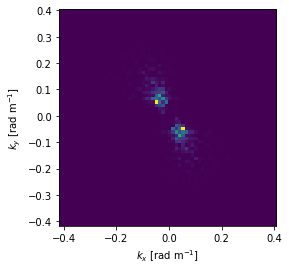

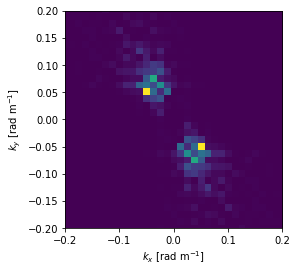

In [47]:
spec2d = surf2d.define_SpectralAnalysis()
# plot the symmetric 2d spectrum
spec2d.plot()
# plot the symmetric 2d spectrum for the given extent
spec2d.plot(extent=[-0.2,0.2,-0.2,0.2])
plt.show()

In [48]:
from wave_tools import shoaling_1d
dx = 0.5
x = np.arange(200, 2200+dx, dx)
g = 9.81
Tp = 10
fp = 1./Tp
gamma  = 3.3
Nf = 100
f_min = 0.001
f_max = 0.4
F = 300000

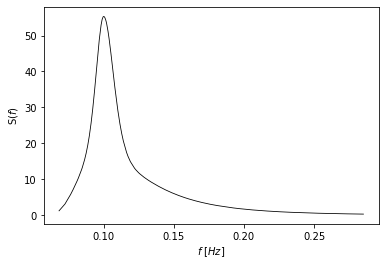

In [49]:
# Create a 1D spectrum and plot it
spec = shoaling_1d.Spectrum(Tp, gamma, F)
spec.plot()
plotting_interface.show()

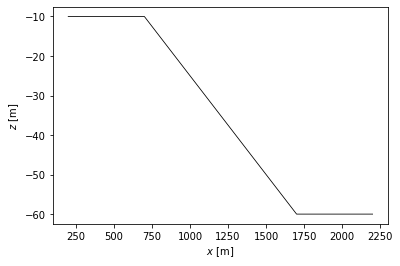

In [50]:
# Define bathymetry
b = shoaling_1d.Bathymetry(x, bathy_filename=None)
b.plot()
plotting_interface.show()

<AxesSubplot:xlabel='$t~\\mathrm{[s]}$', ylabel='$x~\\mathrm{[m]}$'>

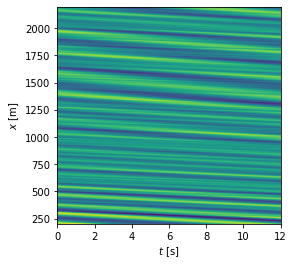

In [51]:
# Create a realization with random phases
realization = shoaling_1d.SpectralRealization(spec, f_min, f_max, Nf, dx)

# Construct wave field from spectrum
Nt = 120
Nx = len(x)
eta = np.zeros((Nt, Nx))
vel = np.zeros((Nt, Nx))
t = np.linspace(0, 12, Nt)

eta = realization.invert(b, t, x)
vel = realization.vel(eta, b,  t, x)
bsurf = surface_core.spacetempSurface('surfprofile', eta, [x, t])
bsurf.plot_3d_as_2d()

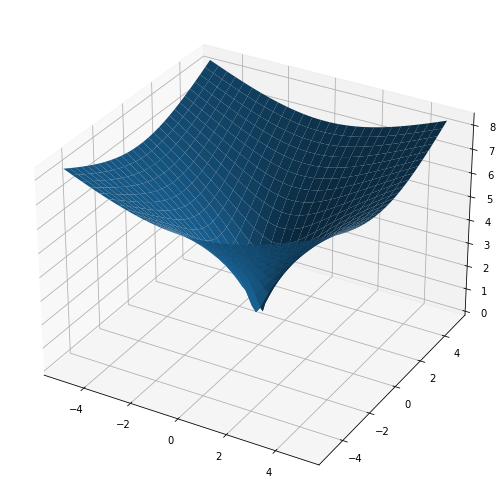

In [52]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.outer(np.linspace(-5, 5, 55), np.ones(55))
y = x.copy().T # transpose
z = np.sqrt( 9.8 * np.sqrt(x**2+y**2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

In [53]:
x

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.81481481, -4.81481481, -4.81481481, ..., -4.81481481,
        -4.81481481, -4.81481481],
       [-4.62962963, -4.62962963, -4.62962963, ..., -4.62962963,
        -4.62962963, -4.62962963],
       ...,
       [ 4.62962963,  4.62962963,  4.62962963, ...,  4.62962963,
         4.62962963,  4.62962963],
       [ 4.81481481,  4.81481481,  4.81481481, ...,  4.81481481,
         4.81481481,  4.81481481],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

In [54]:
np.tanh(2)

0.9640275800758169

In [48]:
Uk = f.get('Uk')

In [52]:
Uk = np.array(Uk)
Uk

array([[0.1062773 , 0.1062773 , 0.1062773 , ..., 0.1062773 , 0.1062773 ,
        0.1062773 ],
       [0.11102711, 0.11102711, 0.11102711, ..., 0.11102711, 0.11102711,
        0.11102711],
       [0.11572868, 0.11572868, 0.11572868, ..., 0.11572868, 0.11572868,
        0.11572868],
       ...,
       [0.8272204 , 0.8272204 , 0.8272204 , ..., 0.8272204 , 0.8272204 ,
        0.8272204 ],
       [0.82746936, 0.82746936, 0.82746936, ..., 0.82746936, 0.82746936,
        0.82746936],
       [0.82771777, 0.82771777, 0.82771777, ..., 0.82771777, 0.82771777,
        0.82771777]])

## Plotting Dispersion Relation

In [147]:
z = f.get('z')

In [154]:
z_list = np.array(z)

In [149]:
U_list = np.array([4,5])

In [150]:
U = f.get('U')

In [153]:
U_list = np.array(U)

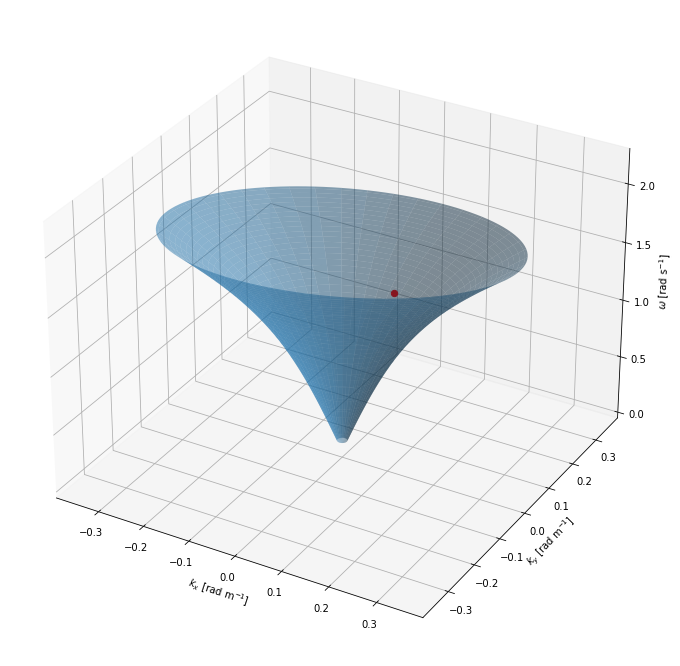

In [363]:
fig = plt.figure(figsize=(12,12))
axes = fig.add_subplot(111, projection='3d')

plotting_interface.plot_disp_shell(axes, h=10, z = z_list, U = U_list, psi = 30)

axes.scatter(0, 0.2, 1, color='red', s=40)
plt.show()

## Extract cloesest estimate for kx ky when W = 2

2 2.0001473227855016 191


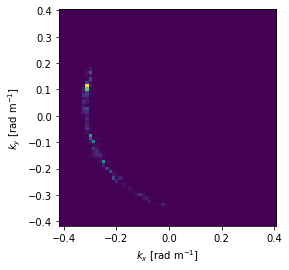

In [311]:
spec3d.plot_w_slice(2)
# Method for 3D, plot kx-ky spectra at a given w

In [312]:
at_w = 2

In [313]:
i = np.argmin(np.abs(spec3d.w[600//2:]-at_w))

In [314]:
thing = spec3d.spectrum()

In [315]:
thing1 = thing[600//2+i,:,:]
thing1.shape

(66, 66)

In [316]:
max_index = np.unravel_index(np.argmax(thing1), thing1.shape)
max_index

(8, 42)

In [317]:
max_kx = spec3d.kx[max_index[0]]
max_ky = spec3d.ky[max_index[1]]

In [318]:
max_kx

-0.3173325912716963

In [319]:
max_ky

0.1142397328578107

## When w = 1.7

1.7 1.6964600329384876 162


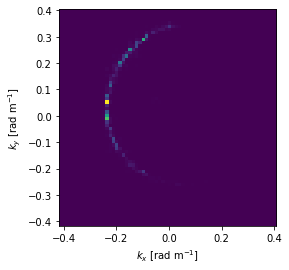

In [348]:
spec3d.plot_w_slice(1.7)
# Method for 3D, plot kx-ky spectra at a given w

In [349]:
at_w = 1.7
i = np.argmin(np.abs(spec3d.w[600//2:]-at_w))

In [350]:
thing = spec3d.spectrum()

In [351]:
thing1 = thing[600//2+i,:,:]
thing1.shape

(66, 66)

In [352]:
max_index = np.unravel_index(np.argmax(thing1), thing1.shape)
max_index

(14, 37)

In [353]:
max_kx = spec3d.kx[max_index[0]]
max_ky = spec3d.ky[max_index[1]]

In [354]:
max_kx

-0.24117276936648915

In [355]:
max_ky

0.050773214603471395

## Try to loop array

In [393]:
kx_list = []
ky_list = []
# empty kx and ky lists for triplet values

thresh_freq = 1
max_freq = 2
step_size = 0.1
# Input frequencies values 

freqs = np.arange(thresh_freq, max_freq, step_size)

for f in freqs:
    i = np.argmin(np.abs(spec3d.w[600//2:]-f))
    spec = spec3d.spectrum()
    spec_values = spec[600//2 + i,:,:]
    # Gives the spectrum values represented by colour
    
    max_index = np.unravel_index(np.argmax(spec_values), spec_values.shape)
    # Finds the specific index of the maximum value in spec_values
    
    max_kx = spec3d.kx[max_index[0]]
    max_ky = spec3d.ky[max_index[1]]
    # Finds the value of kx and ky corresponding to the maximum spectral density 
    
    kx_list.append(max_kx)
    ky_list.append(max_ky)

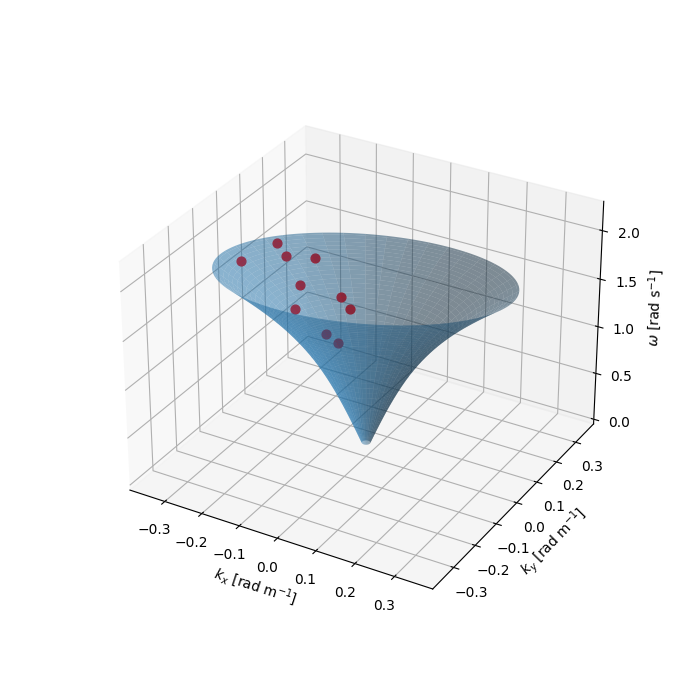

In [394]:
fig = plt.figure(figsize=(7,7))
axes = fig.add_subplot(111, projection='3d')
plotting_interface.plot_disp_shell(axes, h=10, z = z_list, U = U_list, psi = 30)

j = 0
for j in range(0, len(freqs)):
    axes.scatter(kx_list[j], ky_list[j], freqs[j], color='red', s=40)
    
plt.show()

## Making it into a function 

In [395]:
def plot_triplets_vs_disp_surface(thresh_freq, max_freq, step_size, h, z, U, psi):
    freqs = np.arange(thresh_freq, max_freq, step_size)

    for f in freqs:
        i = np.argmin(np.abs(spec3d.w[600//2:]-f))
        spec = spec3d.spectrum()
        spec_values = spec[600//2 + i,:,:]
        # Gives the spectrum values represented by colour
    
        max_index = np.unravel_index(np.argmax(spec_values), spec_values.shape)
        # Finds the specific index of the maximum value in spec_values
    
        max_kx = spec3d.kx[max_index[0]]
        max_ky = spec3d.ky[max_index[1]]
        # Finds the value of kx and ky corresponding to the maximum spectral density 
        
        kx_list.append(max_kx)
        ky_list.append(max_ky)
    
    fig = plt.figure(figsize=(7,7))
    axes = fig.add_subplot(111, projection='3d')
    plotting_interface.plot_disp_shell(axes, h, z, U, psi)

    j = 0
    for j in range(0, len(freqs)):
        axes.scatter(kx_list[j], ky_list[j], freqs[j], color='red', s=40)
    
    plt.show()

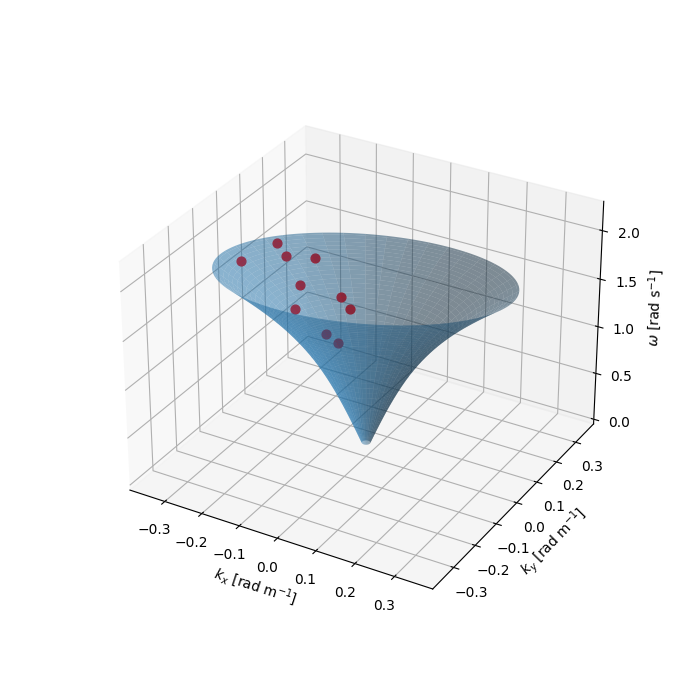

In [402]:
plot_triplets_vs_disp_surface(thresh_freq = 1 , max_freq = 2, step_size = 0.1, h = 10, z = z_list, U = U_list, psi = 30)

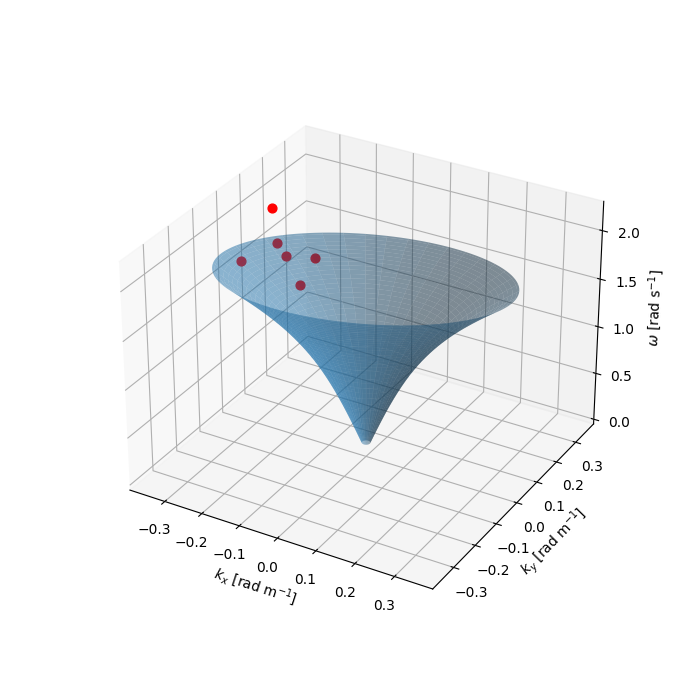

In [372]:
%matplotlib widget

fig = plt.figure(figsize=(7,7))
axes = fig.add_subplot(111, projection='3d')

plotting_interface.plot_disp_shell(axes, h=10, z = z_list, U = U_list, psi = 30)

axes.scatter(-0.19039955476301776, 0.025386607301735697, 1.5, color='red', s=40)
axes.scatter(-0.2030928584138856, 0.1142397328578107, 1.6, color='red', s=40)
axes.scatter(-0.24117276936648915, 0.050773214603471395, 1.7, color='red', s=40)
axes.scatter(-0.2665593766682248, 0.050773214603471395, 1.8, color='red', s=40)
axes.scatter(-0.2665593766682248, -0.10154642920694279, 1.9, color='red', s=40)
axes.scatter(-0.3173325912716963, 0.1142397328578107, 2, color='red', s=40)

plt.show()